In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

def compute_metrics_for_building(folder_path, save_path):
    os.makedirs(save_path, exist_ok=True)  # Ensure output folder exists

    # Iterate over all relevant CSVs
    for file_name in os.listdir(folder_path):
        if "round" not in file_name or not file_name.endswith(".csv"):
            continue

        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        results = []

        # Group by internal 'file' column in the CSV
        for building_file, group in df.groupby("file"):
            y_true = group["true"].values
            y_pred = group["pred"].values

            if np.min(y_true) <= 0:
                continue

            mae = mean_absolute_error(y_true, y_pred)
            mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            smape_value = smape(y_true, y_pred)

            results.append({
                "building_file": building_file,
                "MAE": mae,
                "MAPE": mape,
                "MSE": mse,
                "RMSE": rmse,
                "SMAPE": smape_value
            })

        # Save metrics for this input file
        output_csv = os.path.join(save_path, f"metrics_summary_{file_name}")
        results_df = pd.DataFrame(results)
        results_df.to_csv(output_csv, index=False)

        print(f"Saved metrics for {len(results)} buildings to {output_csv}")


In [3]:
compute_metrics_for_building(
    folder_path="forecast_results", 
    save_path="Build_metrics"
)


Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_1.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_10.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_11.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_12.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_13.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_14.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_15.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_model_round_2.csv
Saved metrics for 357 buildings to Build_metrics\metrics_summary_test_forecast_results_global_mode

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

def extract_round_number(filename):
    match = re.search(r"round[_\-]?(\d+)", filename)
    return int(match.group(1)) if match else None

def get_smape_per_round_for_building(metrics_folder, building_file_name):
    smape_records = []

    for file in os.listdir(metrics_folder):
        if file.endswith(".csv") and "round" in file:
            round_no = extract_round_number(file)
            if round_no is None:
                continue

            file_path = os.path.join(metrics_folder, file)
            df = pd.read_csv(file_path)

            match_row = df[df["building_file"] == building_file_name]
            if not match_row.empty:
                smape_value = match_row["SMAPE"].values[0]
                smape_records.append((round_no, smape_value))

    # Sort by round number
    smape_records.sort(key=lambda x: x[0])
    return smape_records

def plot_smape(smape_records, building_file_name):
    if not smape_records:
        print(f"No SMAPE data found for {building_file_name}")
        return

    rounds, smape_values = zip(*smape_records)
    plt.figure(figsize=(8, 4))
    plt.plot(rounds, smape_values, marker='o', label=building_file_name)
    plt.xlabel("Round Number")
    plt.ylabel("SMAPE (%)")
    plt.title(f"SMAPE across Rounds for {building_file_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


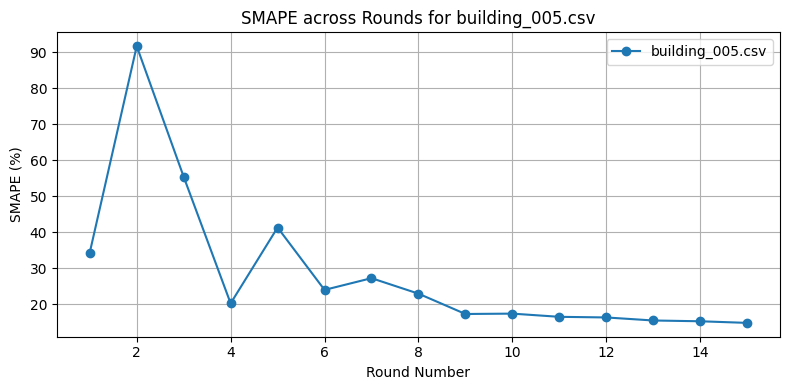

In [5]:
metrics_folder = "Build_metrics"
building_file = "building_005.csv"

records = get_smape_per_round_for_building(metrics_folder, building_file)
plot_smape(records, building_file)


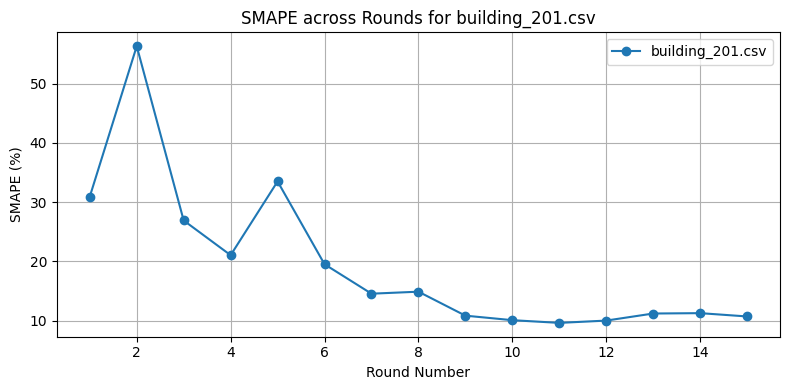

In [6]:
metrics_folder = "Build_metrics"
building_file = "building_201.csv"

records = get_smape_per_round_for_building(metrics_folder, building_file)
plot_smape(records, building_file)


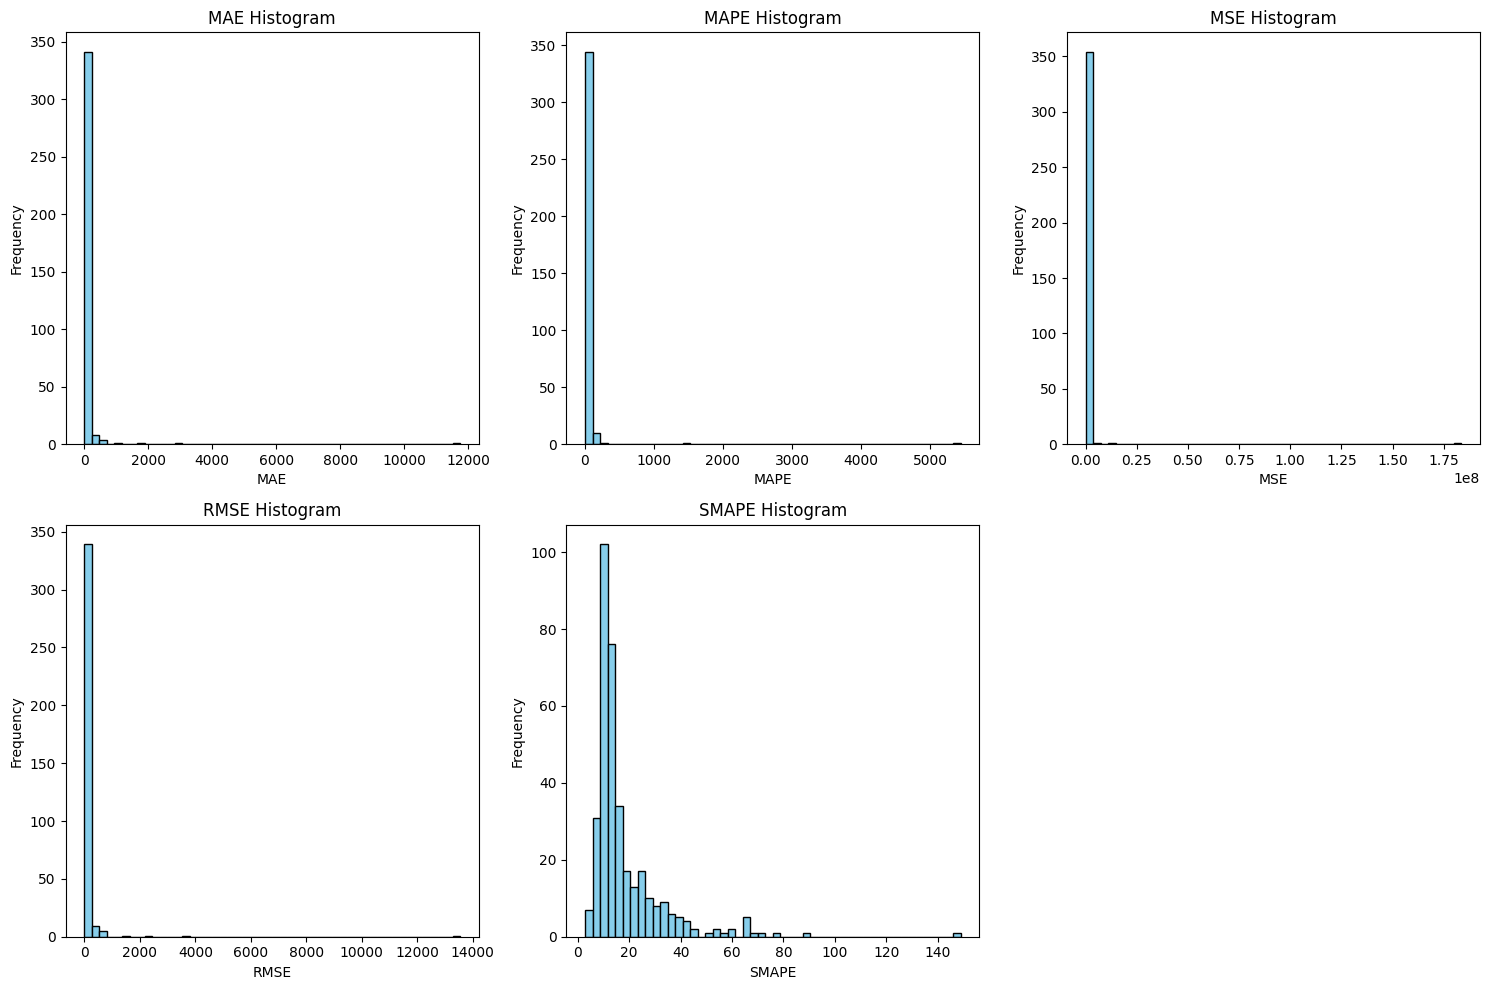

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics file
df = pd.read_csv("Build_metrics\metrics_summary_test_forecast_results_global_model_round_15.csv")

# List of metric columns to plot
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Plot histograms
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[metric], bins=50, color='skyblue', edgecolor='black')
    plt.title(f"{metric} Histogram")
    plt.xlabel(metric)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


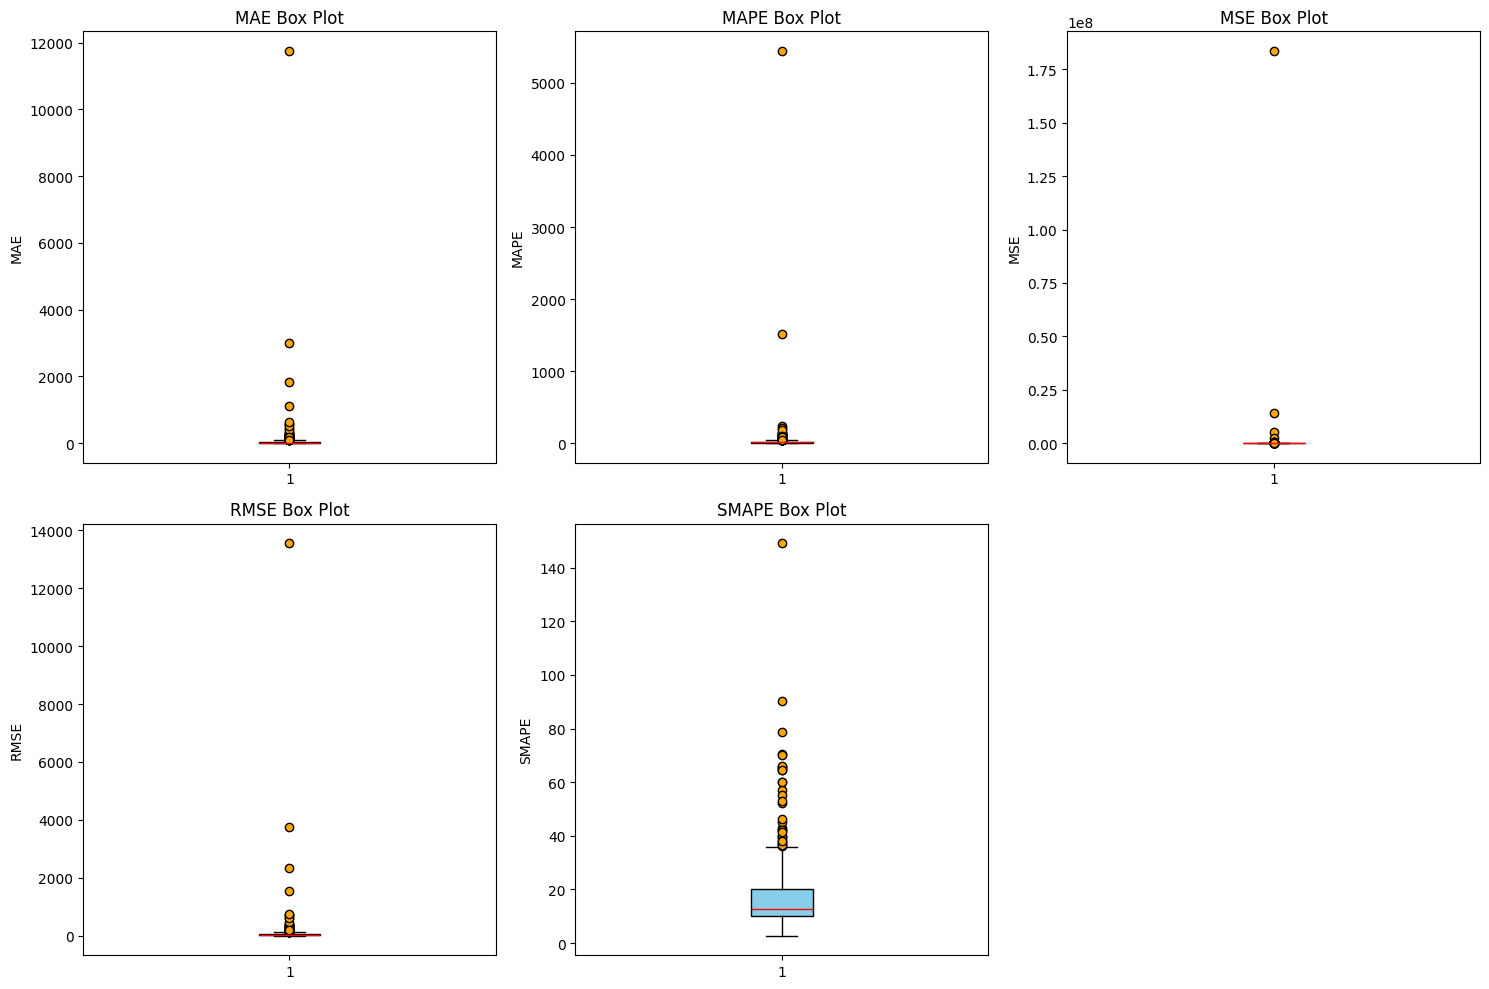

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics file
df = pd.read_csv("Build_metrics/metrics_summary_test_forecast_results_global_model_round_15.csv")

# List of metric columns to plot
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Plot box plots
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[metric].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='orange', marker='o'))
    plt.title(f"{metric} Box Plot")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


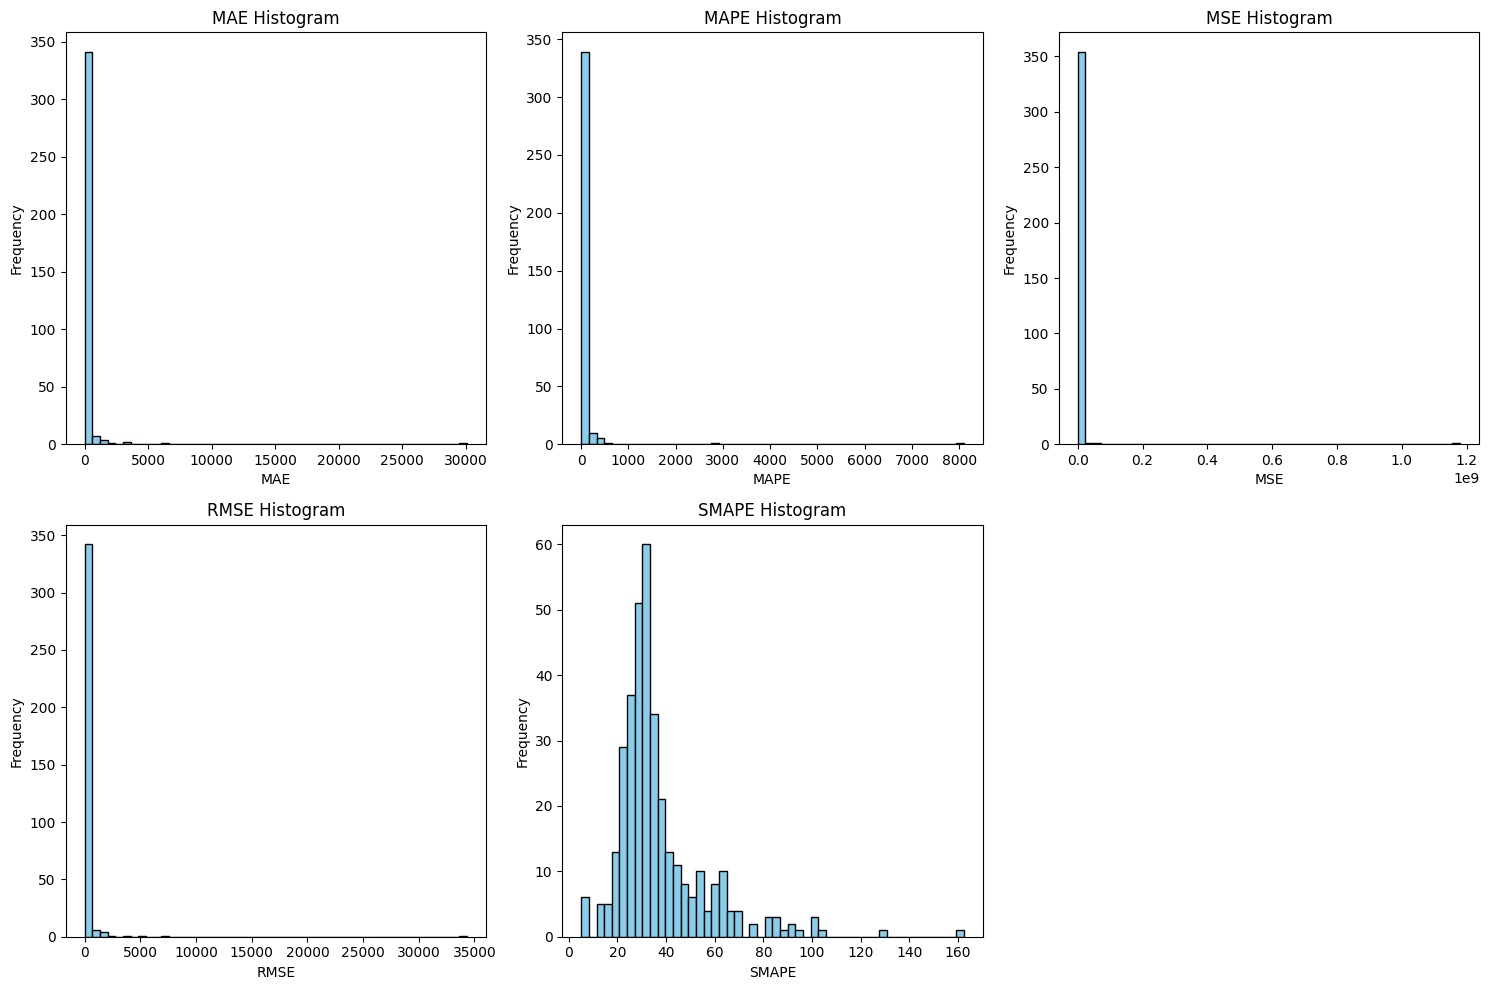

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics file
df = pd.read_csv("Build_metrics\metrics_summary_test_forecast_results_global_model_round_1.csv")

# List of metric columns to plot
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Plot histograms
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[metric], bins=50, color='skyblue', edgecolor='black')
    plt.title(f"{metric} Histogram")
    plt.xlabel(metric)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


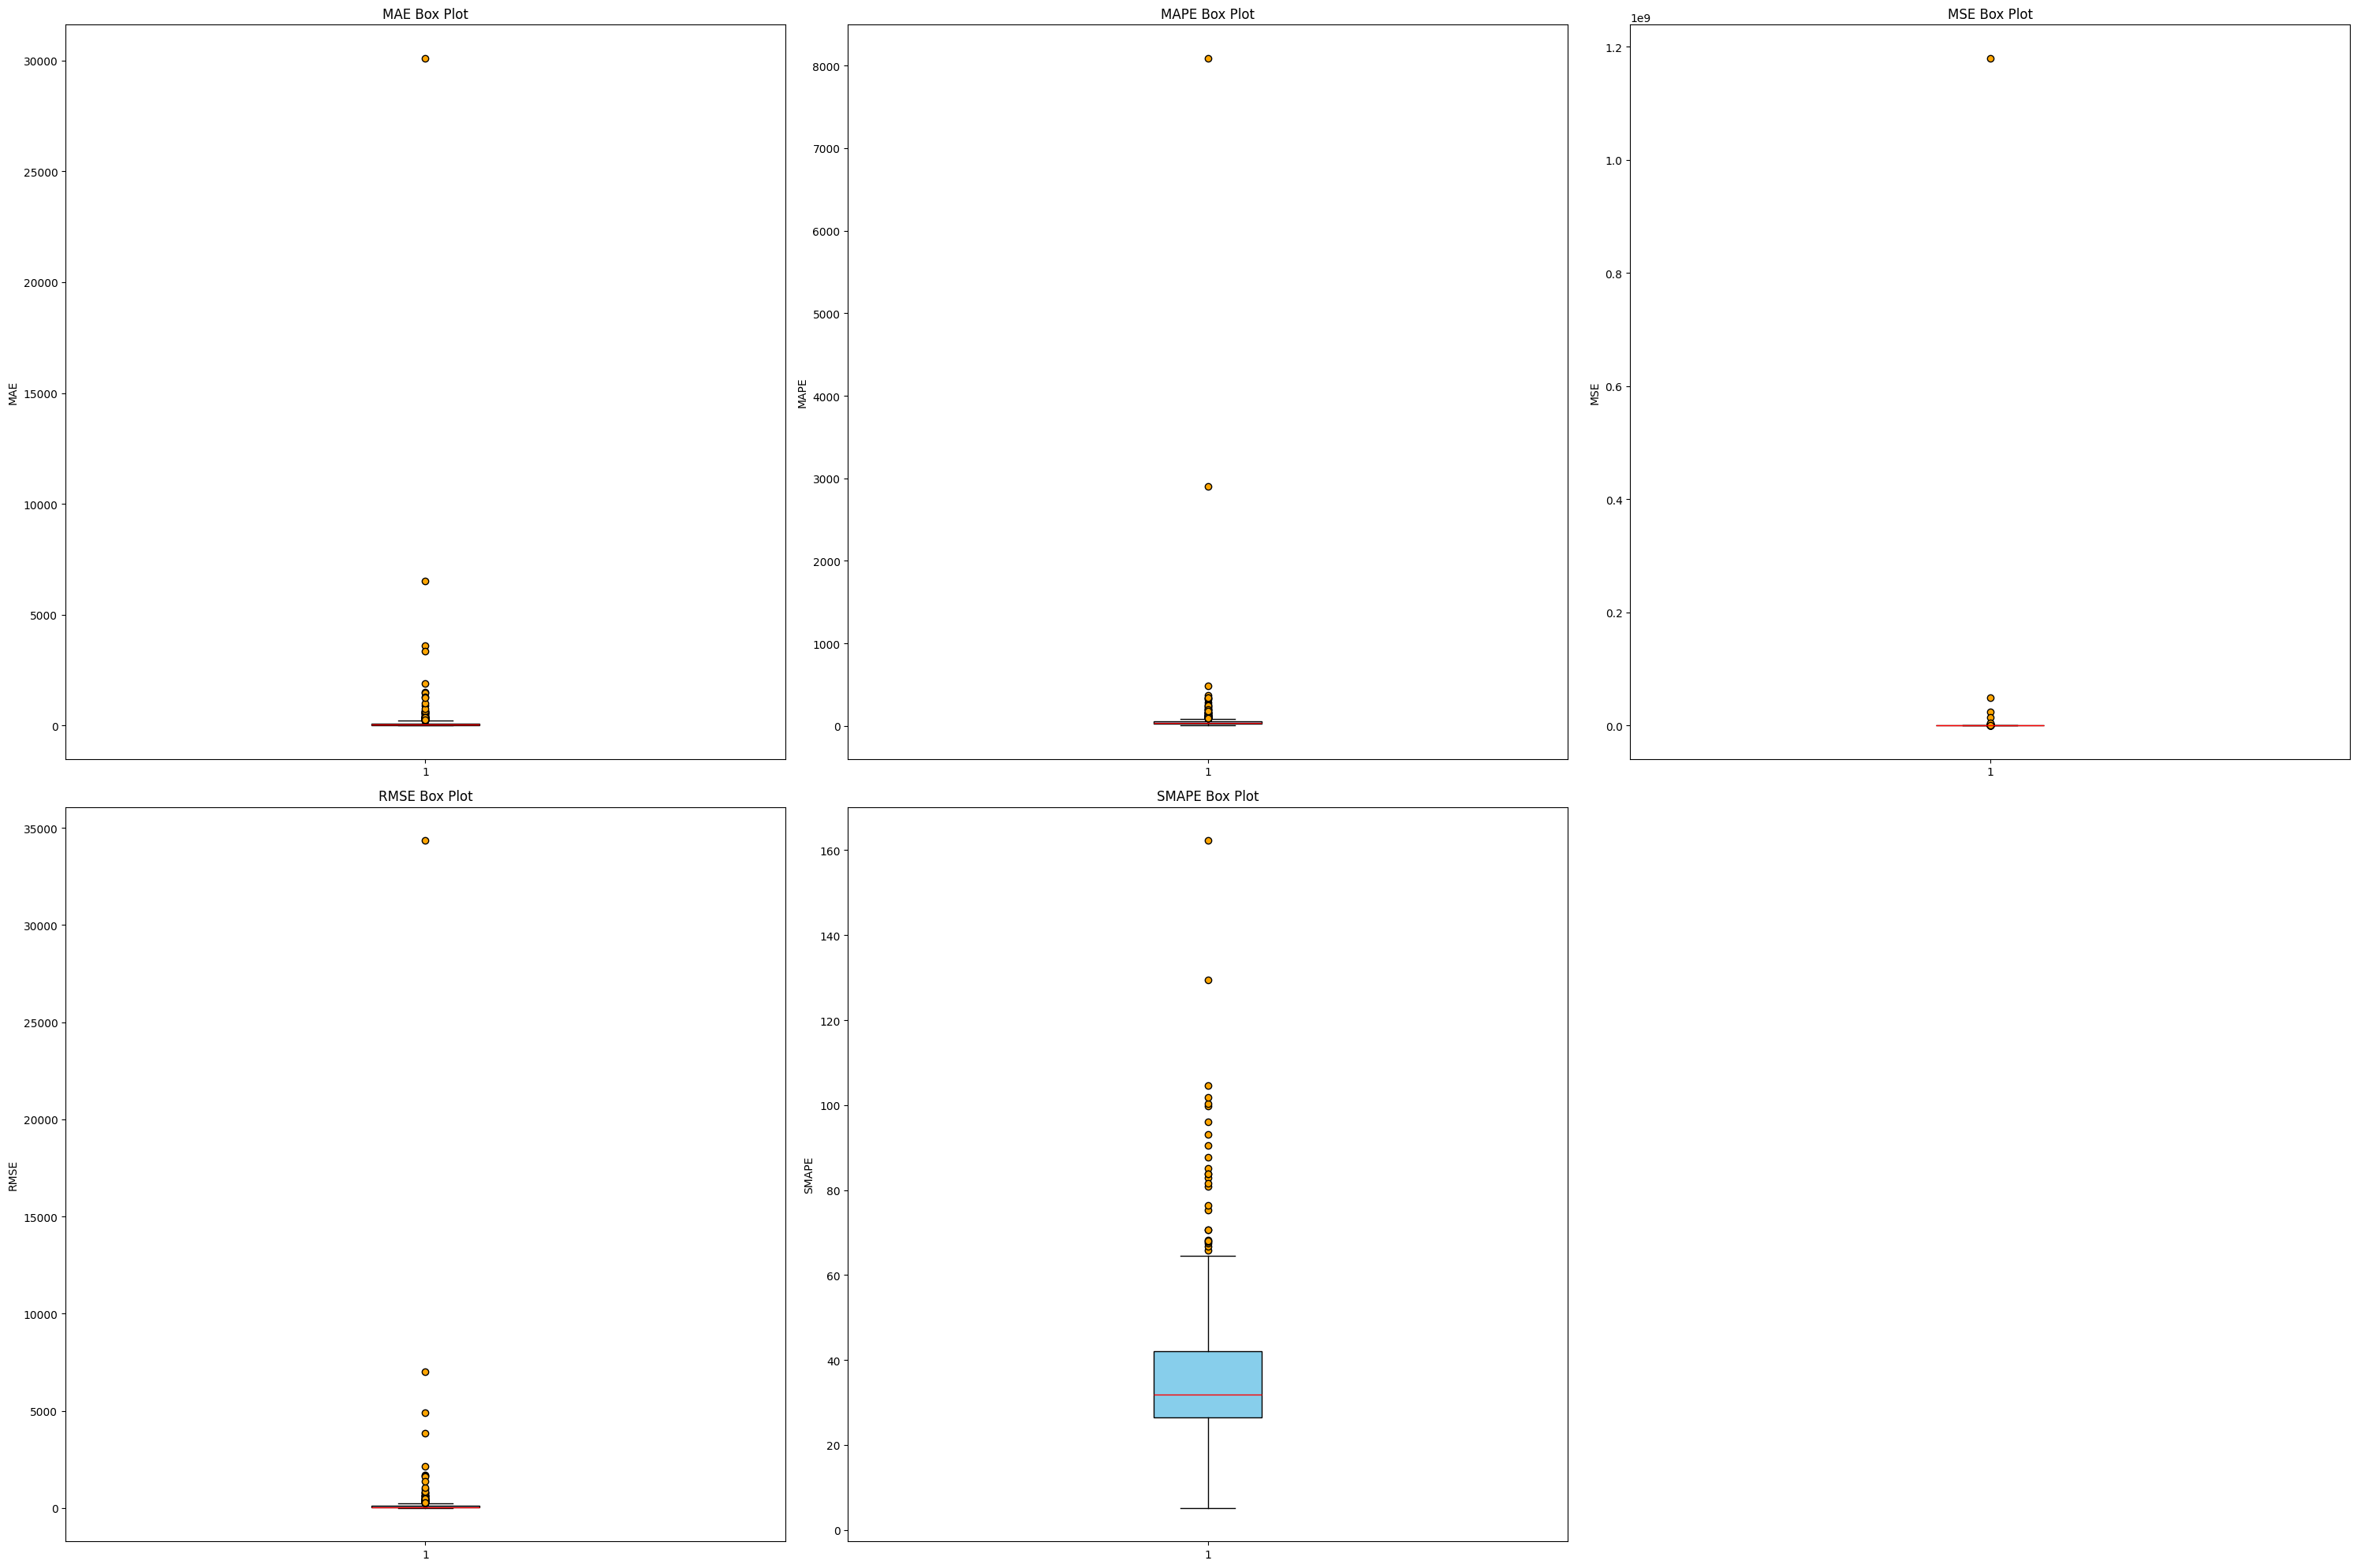

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metrics file
df = pd.read_csv("Build_metrics/metrics_summary_test_forecast_results_global_model_round_1.csv")

# List of metric columns to plot
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Plot box plots
plt.figure(figsize=(30, 20))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[metric].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='orange', marker='o'))
    plt.title(f"{metric} Box Plot")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import glob
import os

# Path to all 15 CSV files
csv_files = glob.glob("Build_metrics/*.csv")  # Adjust path if needed

# Metrics to compute stats on
metrics = ["MAE", "MAPE", "MSE", "RMSE", "SMAPE"]

# Prepare list to store summary for all files
summary_data = []

for file in csv_files:
    if "forecast" not in file:
        continue
    df = pd.read_csv(file)
    file_name = os.path.basename(file)

    for metric in metrics:
        summary_data.append({
            "File": file_name,
            "Metric": metric,
            "Mean": df[metric].mean(),
            "Median": df[metric].median(),
            "Q1 (25%)": df[metric].quantile(0.25),
            "Q3 (75%)": df[metric].quantile(0.75),
        })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Save to CSV
summary_df.to_csv("Build_metrics/summary_all_files.csv", index=False)

print("Summary statistics saved to 'Build_metrics/summary_all_files.csv'")


Summary statistics saved to 'Build_metrics/summary_all_files.csv'


In [12]:
summary_df

,File,Metric,Mean,Median,Q1 (25%),Q3 (75%)
0,metrics_summary_test_forecast_results_global_m...,MAE,2.330065e+02,42.421566,20.956667,101.774471
1,metrics_summary_test_forecast_results_global_m...,MAPE,8.630226e+01,36.099863,28.717320,53.445646
2,metrics_summary_test_forecast_results_global_m...,MSE,3.627069e+06,2294.278193,554.389485,13413.021483
3,metrics_summary_test_forecast_results_global_m...,RMSE,2.663618e+02,47.898624,23.545477,115.814600
4,metrics_summary_test_forecast_results_global_m...,SMAPE,3.703809e+01,31.876692,26.390614,42.100827
...,...,...,...,...,...,...
70,metrics_summary_test_forecast_results_global_m...,MAE,1.019510e+02,19.039283,9.041565,45.585002
71,metrics_summary_test_forecast_results_global_m...,MAPE,4.722058e+01,15.256184,12.061522,25.089091
72,metrics_summary_test_forecast_results_global_m...,MSE,6.505641e+05,638.310464,132.637537,3738.106267
73,metrics_summary_test_forecast_results_global_m...,RMSE,1.250295e+02,25.264807,11.516837,61.140055


In [13]:
import re

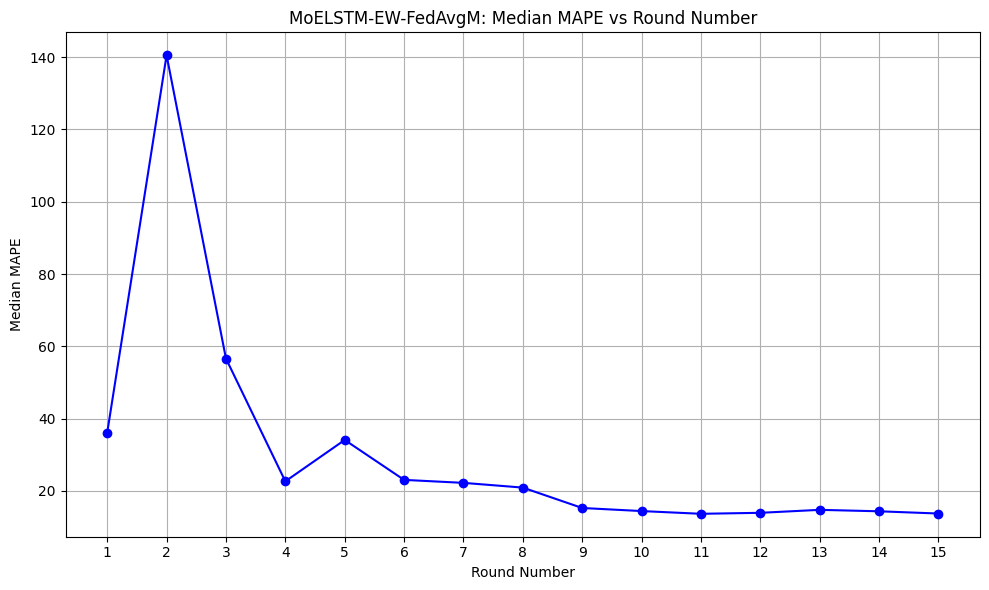

In [14]:
mape_df = summary_df[summary_df["Metric"] == "MAPE"].copy()

# Extract round number using regex
mape_df["Round"] = mape_df["File"].apply(lambda x: int(re.search(r"round_(\d+)", x).group(1)))

# Sort by round number
mape_df = mape_df.sort_values("Round")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mape_df["Round"], mape_df["Median"], marker='o', linestyle='-', color='blue')
plt.xlabel("Round Number")
plt.ylabel("Median MAPE")
plt.title("MoELSTM-EW-FedAvgM: Median MAPE vs Round Number")
plt.grid(True)
plt.xticks(mape_df["Round"])  # ensure all rounds are shown
plt.tight_layout()
plt.show()

In [15]:
mape_df.tail()

,File,Metric,Mean,Median,Q1 (25%),Q3 (75%),Round
11,metrics_summary_test_forecast_results_global_m...,MAPE,46.152291,13.651162,10.117973,24.966556,11
16,metrics_summary_test_forecast_results_global_m...,MAPE,46.701845,13.922898,10.576663,25.995915,12
21,metrics_summary_test_forecast_results_global_m...,MAPE,42.687091,14.743593,11.414458,25.664699,13
26,metrics_summary_test_forecast_results_global_m...,MAPE,41.267657,14.343561,11.120214,23.987938,14
31,metrics_summary_test_forecast_results_global_m...,MAPE,42.458257,13.724903,10.365778,23.921815,15


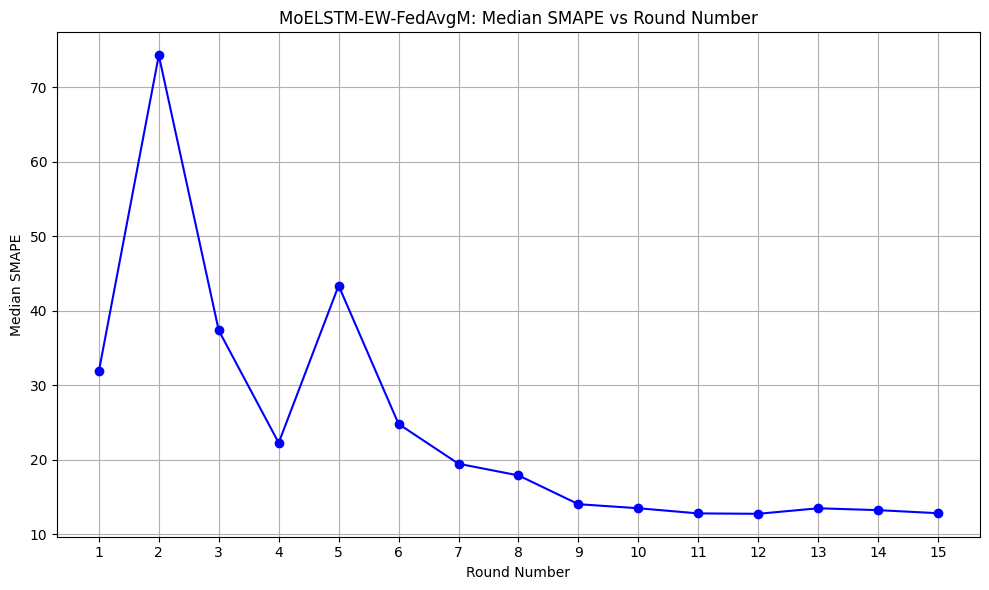

In [16]:
smape_df = summary_df[summary_df["Metric"] == "SMAPE"].copy()

# Extract round number using regex
smape_df["Round"] = smape_df["File"].apply(lambda x: int(re.search(r"round_(\d+)", x).group(1)))

# Sort by round number
smape_df = smape_df.sort_values("Round")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(smape_df["Round"], smape_df["Median"], marker='o', linestyle='-', color='blue')
plt.xlabel("Round Number")
plt.ylabel("Median SMAPE")
plt.title("MoELSTM-EW-FedAvgM: Median SMAPE vs Round Number")
plt.grid(True)
plt.xticks(smape_df["Round"])  # ensure all rounds are shown
plt.tight_layout()
plt.show()

In [17]:
smape_df.tail()

,File,Metric,Mean,Median,Q1 (25%),Q3 (75%),Round
14,metrics_summary_test_forecast_results_global_m...,SMAPE,18.348620,12.821705,9.848618,21.555561,11
19,metrics_summary_test_forecast_results_global_m...,SMAPE,18.796783,12.769002,9.854427,21.675407,12
24,metrics_summary_test_forecast_results_global_m...,SMAPE,18.751194,13.509433,10.849095,21.270451,13
29,metrics_summary_test_forecast_results_global_m...,SMAPE,18.404849,13.259108,10.703805,21.194670,14
34,metrics_summary_test_forecast_results_global_m...,SMAPE,18.056201,12.847500,10.027507,20.367705,15
